In [10]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [11]:
len(train_data)

8982

In [12]:
len(test_data)

2246

In [13]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [27]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [42]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [54]:
one_hot_test_labels.shape

(2246, 46)

In [44]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [45]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [46]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [47]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 305us/step - loss: 2.6039 - acc: 0.5227 - val_loss: 1.6958 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 2s 258us/step - loss: 1.3844 - acc: 0.7150 - val_loss: 1.2954 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 2s 239us/step - loss: 1.0310 - acc: 0.7811 - val_loss: 1.1273 - val_acc: 0.7720
Epoch 4/20
7982/7982 [==============================] - 2s 236us/step - loss: 0.8106 - acc: 0.8232 - val_loss: 1.0242 - val_acc: 0.8000
Epoch 5/20
7982/7982 [==============================] - 2s 235us/step - loss: 0.6412 - acc: 0.8604 - val_loss: 0.9686 - val_acc: 0.8060
Epoch 6/20
7982/7982 [==============================] - 2s 231us/step - loss: 0.5137 - acc: 0.8887 - val_loss: 0.9310 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 2s 251us/step - loss: 0.4128 - acc: 0.9139 - val_loss: 0.9117 - val_acc: 0.8270


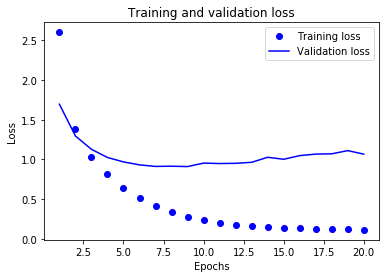

In [50]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

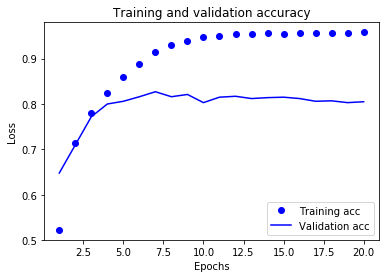

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Best fit at epoch = 9

In [51]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.fit(partial_x_train,
        partial_y_train,
        epochs=9,
        batch_size=512,
        validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 288us/step - loss: 2.6073 - acc: 0.5264 - val_loss: 1.7036 - val_acc: 0.6380
Epoch 2/9
7982/7982 [==============================] - 2s 207us/step - loss: 1.4107 - acc: 0.7023 - val_loss: 1.3179 - val_acc: 0.7110
Epoch 3/9
7982/7982 [==============================] - 2s 223us/step - loss: 1.0569 - acc: 0.7749 - val_loss: 1.1428 - val_acc: 0.7490
Epoch 4/9
7982/7982 [==============================] - 2s 269us/step - loss: 0.8332 - acc: 0.8188 - val_loss: 1.0446 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 2s 238us/step - loss: 0.6547 - acc: 0.8609 - val_loss: 0.9778 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 2s 261us/step - loss: 0.5238 - acc: 0.8926 - val_loss: 0.9410 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 2s 223us/step - loss: 0.4190 - acc: 0.9104 - val_loss: 0.9075 - val_acc: 0.8190
Epoch 8

In [52]:
print("Test loss:", results[0])
print("Test acc:", results[1])

Test loss: 1.00397786071
Test acc: 0.784951024069


In [59]:
# Predicting
predictions = model.predict(x_test)
print(predictions[0].shape)
print(sum(predictions[0]))

(46,)
0.999999927199


Here we used categorical labels for learning. In case of integer variables, loss function used is:<br> 
<b>sparse_categorical_crossentropy</b>

y_train = np.array(train_labels) <br>
y_test = np.array(test_labels)  <br>

model.compile(optimizer='rmsprop',<br>
loss='sparse_categorical_crossentropy',<br>
metrics=['acc'])

In [62]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=128,
            validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

print("Test loss:", results[0])
print("Test acc:", results[1])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 189us/step - loss: 3.5173 - acc: 0.0787 - val_loss: 3.2234 - val_acc: 0.1280
Epoch 2/20
7982/7982 [==============================] - 1s 123us/step - loss: 2.8013 - acc: 0.2492 - val_loss: 2.4683 - val_acc: 0.4560
Epoch 3/20
7982/7982 [==============================] - 1s 122us/step - loss: 2.0043 - acc: 0.4743 - val_loss: 1.9022 - val_acc: 0.4680
Epoch 4/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.5417 - acc: 0.5336 - val_loss: 1.5835 - val_acc: 0.6340
Epoch 5/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.2759 - acc: 0.6461 - val_loss: 1.4968 - val_acc: 0.6240
Epoch 6/20
7982/7982 [==============================] - 1s 124us/step - loss: 1.1686 - acc: 0.6463 - val_loss: 1.4493 - val_acc: 0.6340
Epoch 7/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.0853 - acc: 0.6630 - val_loss: 1.4443 - val_acc: 0.6400


Test accuracy dropped by 10% just beacuase of the The layers used should have more units than the output classes. 